In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import numpy as np

In [197]:
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

# Check and clean the data

In [198]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [199]:
train = train.dropna(axis='columns')
train = train.drop_duplicates()
train = train.loc[:, ~(train == 0).any(axis=0)]
if train.isnull().values.any():
  train = train.dropna(axis=1)
print(train.shape)
train.head()

(1460, 40)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1710,Gd,8,Typ,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1262,TA,6,Typ,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1786,Gd,6,Typ,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1717,Gd,7,Typ,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2198,Gd,9,Typ,Y,12,2008,WD,Normal,250000


In [200]:
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [201]:
test = test.dropna(axis='columns')
test = test.drop_duplicates()
test = test.loc[:, ~(test == 0).any(axis=0)]
if test.isnull().values.any():
  test = test.dropna(axis=1)
print(test.shape)
test.head()

(1459, 33)


,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,TotRmsAbvGrd,PavedDrive,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,TA,Y,SBrkr,896,896,5,Y,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,TA,Y,SBrkr,1329,1329,6,Y,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,Gd,Y,SBrkr,928,1629,6,Y,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,Ex,Y,SBrkr,926,1604,7,Y,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,Ex,Y,SBrkr,1280,1280,5,Y,1,2010,Normal


- align train and test features

In [202]:
for col in train.columns:
  if col not in test.columns:
    test[col] = 0
test = test[train.columns]
assert list(train.columns) == list(test.columns), 'Train and Test have not same features'

- exploration of the data
  - check for outliers
  - check for data distribution

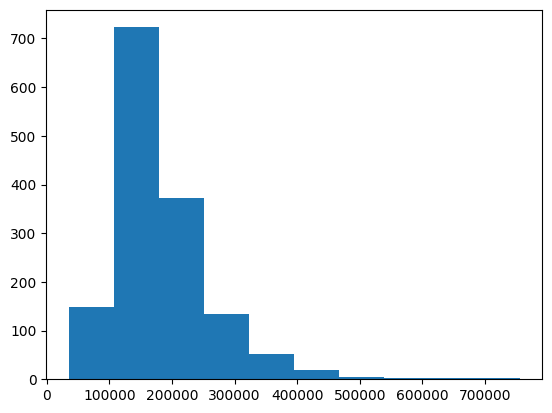

In [203]:
plt.hist(train.SalePrice)
plt.show()

In [204]:
numeric_cols = train.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower) | (train[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')


Id: 0 outliers
MSSubClass: 103 outliers
LotArea: 69 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 7 outliers
YearRemodAdd: 0 outliers
1stFlrSF: 20 outliers
GrLivArea: 31 outliers
TotRmsAbvGrd: 30 outliers
MoSold: 0 outliers
YrSold: 0 outliers
SalePrice: 61 outliers


In [205]:
numeric_cols = test.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = test[(test[col] < lower) | (test[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')


Id: 0 outliers
MSSubClass: 104 outliers
MSZoning: 0 outliers
LotArea: 60 outliers
Utilities: 0 outliers
OverallQual: 2 outliers
OverallCond: 127 outliers
YearBuilt: 2 outliers
YearRemodAdd: 0 outliers
Exterior1st: 0 outliers
Exterior2nd: 0 outliers
1stFlrSF: 23 outliers
GrLivArea: 44 outliers
KitchenQual: 0 outliers
TotRmsAbvGrd: 21 outliers
Functional: 0 outliers
MoSold: 0 outliers
YrSold: 0 outliers
SaleType: 0 outliers
SalePrice: 0 outliers


In [206]:
cols_to_log = ['MSSubClass','OverallCond','GrLivArea','LotArea', '1stFlrSF','TotRmsAbvGrd']
train[cols_to_log] = np.log2(train[cols_to_log] + 1)  # +1 per evitare log(0)

test [cols_to_log] = np.log2(test[cols_to_log]+1)

#Encode categorical features
  - check dimension of each feature vector
  - decide encoding technique based on the dimension information

In [207]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()

In [208]:
train.columns = train.columns.str.strip()
target = train['SalePrice']
features = train.drop(columns='SalePrice')
y_true = test['SalePrice']
x_test = test.drop(columns='SalePrice')

cat_columns = list(features.select_dtypes(include=['object']).columns)
num_columns = list(features.select_dtypes(include=['number']).columns)



for col in cat_columns:
    x_test[col] = x_test[col].astype(str)
    features[col] = features[col].astype(str)

features[cat_columns] = features[cat_columns].fillna('missing')
x_test[cat_columns] = x_test[cat_columns].fillna('missing')


features[cat_columns] = encoder.fit_transform(features[cat_columns])
features[num_columns] = scaler.fit_transform(features[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])
x_test[cat_columns] = encoder.transform(x_test[cat_columns])

features = features.astype(np.float32)
x_test = x_test.astype(np.float32)


In [209]:
import tensorflow.keras as tf
from tensorflow.keras.callbacks import EarlyStopping


model = tf.Sequential()
model.add(tf.layers.Dense(25,input_dim=features.shape[1], activation='relu'))
model.add(tf.layers.Dropout(0.2))
model.add(tf.layers.Normalization())
model.add(tf.layers.Dense(18, activation='relu'))
model.add(tf.layers.Dropout(0.15))
model.add(tf.layers.Normalization())
model.add(tf.layers.Dense(10, activation='relu'))
model.add(tf.layers.Dropout(0.1))
model.add(tf.layers.Normalization())
model.add(tf.layers.Dense(5,activation='relu'))
model.add(tf.layers.Dropout(0.1))
model.add(tf.layers.Dense(1))

target  = target.values.reshape(-1, 1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

history = model.fit(
    x=features,
    y=target,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)
prediction = model.evaluate(x_test,y_true, return_dict=True)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 180658.6406 - val_loss: 182187.5000
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176814.7188 - val_loss: 180981.2344
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177667.2031 - val_loss: 169946.8906
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161105.0156 - val_loss: 118436.6172
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103727.1484 - val_loss: 56856.8711
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71109.7109 - val_loss: 53292.8594
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66800.8516 - val_loss: 52677.4414
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63473.4102 - val_loss: 51019.2422
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67036.2344 - val_loss: 50237.4570
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61576.1367 - val_loss: 49282.9023
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60549.1562 -

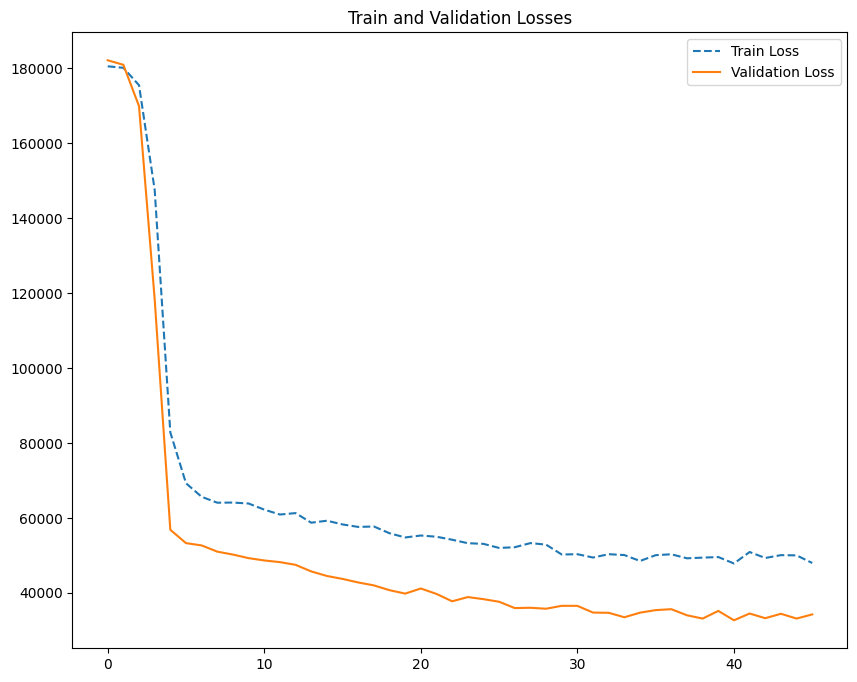

In [210]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], linestyle='--', label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Losses')
plt.legend()
plt.show()